## Importance in networks ##

When analyzing the structure of a network, a common question is
>Which vertices are **important**?

To answer, we assign each node $i$ a **centrality** score $\theta_i$ that measures its importance *in some sense*.
- if $\theta_i$ is *ordinal*, we might call the result a **ranking**
- if $\theta_i$ is **real-valued**, we might call the result an **embedding**

How we produce these scores depends on what we mean by "important":
- is the node located at the top of a competitive **hierarchy**?
- is there a large **flow** of information that passes through the node? 
- has the node a large **influence** on the behavior of other nodes?

Every answer to this question defines an importance function $f : G \to \vec{\theta}$.
We can think of $f$ as a vector-valued summary statistic for $G$.

### Importance metrics ###

Generally, a metric $f$ measures importance in one of two senses:
- **Structural importance**: $\theta_i$ is a measure of **centrality** in the network, derived from characterizing $i$'s role in the structure of $G$. For instance, based on
    - node connectivity
    - motifs
    - positions
- **Dynamical importance**: $\theta_i$ is a measure of **influence**, derived from characterizing $i$'s role in a dynamical process running on top of $G$. Generally, $u$ is influential if a change to some state variable $x_u$ of node $u$ induces state-variable changes in many other nodes. For instance:
    - $u$ being a super spreader in network epidemics
    - $u$ being an influencer in information cascades
    
Measures of dynamical importance are generally computationally **expensive**.
Structural importance are thus more popular and usually a **cheap** structural importance can **approximate** the answer of an expensive dynamical importance.

### Connectivity centralities ###

The simplest measure of importance is the **degree** of a vertex $k_i$, a measure that is sometimes called **degree centrality** in sociology.
Idea: vertices with larger degrees exert greater effect on the network, both in large-scale organization and in dynamic processes.

the ZK graph with node size proportional to degree:


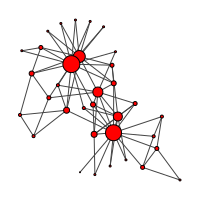

In [1]:
import igraph
# we re-load the ZK graph
ZK = igraph.Graph.Famous('Zachary')

print('the ZK graph with node size proportional to degree:')
vs_ZK = {"bbox":(200,200), "margin":20}
vs_ZK['vertex_size'] = ZK.degree()
igraph.plot(ZK, **vs_ZK)

### Centrality from eigenvectors ###

The degree of a vertex captures only a **local** measure of importance.
To generalize, we can increase the importance of vertices who are **connected** to other **high-degree** vertices, i.e., *not all neighbors are equal*.

**Eigenvector centralities** assign a vertex an importance score that is proportional to the importance scores of its neighbors -- this is a *recursive* notion of importance.
There are several ways to formalize this, but they can all be calculated as the *principal eigenvector* for a particular eigenvalue problem.
The most known are:
- Bonacich's **eigenvector** centrality 
- **PageRank**
- **Katz** centrality
- **hub/authority** scores

### Eigenvector centrality ###

The **eigenvector** centrality of all nodes is obtained initializing $x_i^0=\frac{1}{n}$ for all $i$ and updating each $x_i$ through the equation:
$$x_i^{t+1} = \sum_{j=1}^n A_{ij}x_j^t$$
with a normalization at every step so that $\sum_{i=1}^n x_i^t = 1$ for all $t$.

Basically, each vertex iteratively transfers some of its importance to its neighbors.

### Eigenvector centrality ###

This table shows how the vector $x^t$ varies with $t$ for the ZK graph:

<img src="images/eigenvector.png" alt="The evolution of the eigenvector centrality for the ZK graph" title="The evolution of the eigenvector centrality for the ZK graph" style="width: 400px;"/>

Afte $t = 15$, $x$ has essentially stopped changing, indicating convergence on a **fixed point**.

### Eigenvector centrality ###

In undirected connected graphs, this convergence is guaranteed and the fixed point is equivalent to the **principal eigenvector** of the adjacency matrix $A$.
This means that, instead of iterating, we can define $x$ as the solution of
$$Ax = \lambda_1x$$
where $\lambda_1$ is the **largest eigenvalue** of $A$.
Solving this eigenvector problem costs $O(n^3)$ time (possibly reduced to $n^{2.373}$ or even $n^2 \ln n$).

the ZK graph with node size proportional to eigenvector centrality:


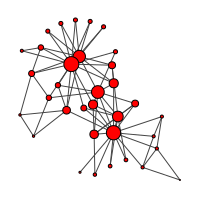

In [2]:
print('the ZK graph with node size proportional to eigenvector centrality:')
vs_ZK = {"bbox":(200,200), "margin":20}
vs_ZK['vertex_size'] = [15*x for x in ZK.eigenvector_centrality()]
igraph.plot(ZK, **vs_ZK)

the eigenvector centrality is generally correlated with the degree
in ZK, the Pearson correlation coefficient between x and k/m is 0.84


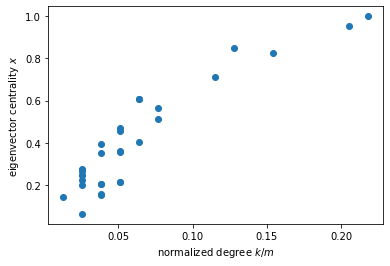

In [3]:
import matplotlib.pyplot as plt

normalized_degree = [d/ZK.ecount() for d in ZK.degree()]
ec = ZK.eigenvector_centrality()
ax = plt.scatter(normalized_degree, ec)
plt.xlabel('normalized degree $k/m$')
plt.ylabel('eigenvector centrality $x$')
print('the eigenvector centrality is generally correlated with the degree')
print('in ZK, the Pearson correlation coefficient between x and k/m is 0.84')

### PageRank ###

**PageRank** has some nicer features with respect to Bonacich's eigenvector centrality.
In particular, Bonacich's definition performs **poorly** for **directed** networks:
- the centrality will be zero for all vertices not in a strongly connected component
- in an directed acyclic graph, only vertices with $k^{\mathrm{out}} = 0$ will have non-zero centrality

PageRank solves these problems by adding two features:
1. it assigns every vertex a **small amount** of centrality regardless of its network position;
2. it **divides** the centrality contribution of a vertex by its **out-degree**

This means that:
- vertices with zero in-degree have non-zero centrality and can contribute to the centrality of vertices they link to
- vertices with high in-degree will have higher centrality even if the vertices that link to them are not central themselves
- vertices that are pointed by a single high-centrality vertex will not be themselves highly-central

### PageRank ###

Mathematically:
$$x_i^{t+1} = \alpha \sum_{j=1}^n A_{ij}\frac{x_j^t}{\max(1,k_j^{\mathrm{out}})} + 1$$
where $\alpha>0$ scales the relative contributions of the eigenvector and uniform centrality.
The vector $x$ is the solution to
$$x = \alpha AD^{-1}x + \beta\mathbb{1}$$
where $D$ is the diagonal matrix having $D_{ii}=\max(1,k_i^{\mathrm{out}})$ and $\mathbb{1}$ is the identity matrix.

- with $\alpha = 1$, PageRank on an undirected network is equivalent to the **degree centrality**
- in the limit of $\alpha \to 0$, all centralities converge to $1$
- a common choice is $\alpha = 0.85$


the ZK graph with node size proportional to PageRank:


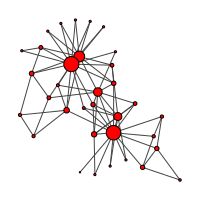

In [4]:
print('the ZK graph with node size proportional to PageRank:')
vs_ZK = {"bbox":(200,200), "margin":20}
vs_ZK['vertex_size'] = [150*x for x in ZK.pagerank()]
igraph.plot(ZK, **vs_ZK)

the PageRank is generally correlated with both the degree and the eigenvector centrality, but to different extents
in ZK, the Pearson correlation coefficient between y and k/m is 0.73, between y and x is 0.38


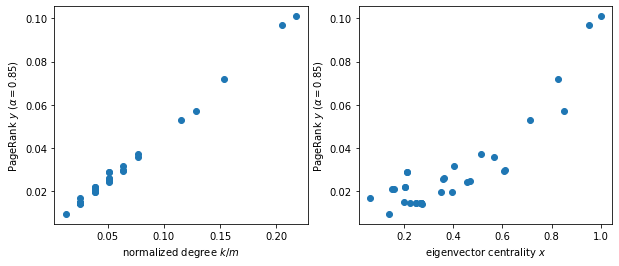

In [5]:
pagerank = ZK.pagerank()

fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)

ax[0].scatter(normalized_degree, pagerank)
ax[0].set_xlabel('normalized degree $k/m$')
ax[0].set_ylabel(r'PageRank $y$ ($\alpha=0.85$)')
ax[1].scatter(ec, pagerank)
ax[1].set_xlabel('eigenvector centrality $x$')
ax[1].set_ylabel(r'PageRank $y$ ($\alpha=0.85$)')

print('the PageRank is generally correlated with both the degree and the eigenvector centrality, but to different extents')
print('in ZK, the Pearson correlation coefficient between y and k/m is 0.73, between y and x is 0.38')

### Eigenvector centrality ###

Regardless of the correlation, the **ranking** provided by these three metrics is fairly **stable**, with most of the disagreement between PageRank and eigenvector centrality being on the ordering of lower-importance vertices.

<img src="images/ranking.png" alt="Top-5 vertices for degree, eigenvector centrality and PageRank" title="Top-5 vertices for degree, eigenvector centrality and PageRank" style="width: 400px;"/>

### More on PageRank ###

PageRank is the algorithm used by **Google** to estimate the importance of pages on the World Wide Web (Larry Page is one of Google's founders).

The size of the Web graph is $n \approx 10^{10}$, which makes matrix calculation **unfeasible**.
Google instead computes is **simulating** the "voting" process.

This gives an alternative interpretation of the PageRank as a model of a **random walker** on the network structure: 
- when we normalize the contribution to $i$'s importance from $j$ by $j$'s out-degree, we are *de facto* simulating a random walker which, when at $j$, chooses a new state uniformly at random from among the neighbors of $j$
- the constant term $\alpha$ is a "teleportation" probability: with probability $1-\alpha$ the walker moves to a vertex chosen uniformly at random in $G$
- when $\alpha$ is large, the random walker tends to walk along the network's edges
- yet, the teleportation probability allows the walk to exit a part of the network with few out-going edges -- on the WWW, this happens quite often!

The PageRank $y_i$ of vertex $i$ is the probability that, at the "end" of the walk (i.e., when $t\to \infty$), the random walker is in $i$.

### Geometric centralities ###

Another class of centrality measures identifies important vertices relying on **distances** on $G$.
Notably, geodesic distances on a graph are **not metric** and do *not* obey the triangle inequality.

Let $l_{ij}$ be the distance between $i$ and $j$ and $l_i$ be the average distance of $i$ from all other vertices.
The two most known geometric centralities are:
- **closeness** centrality $C_i = \frac{1}{l_i} = \frac{n}{\sum_j l_{ij}}$
- **harmonic** centrality $C_i = \frac{1}{n-1} \sum_{j\neq i} \frac{1}{l_{ij}}$

The closeness has two problems:
- it is *not* robust under small variations in network topology: a few missing edges may produce large changes in a relative ordering
- it *cannot* be calculated for a network that is not a single strongly connected component

The harmonic centrality solves both problems.

### Geometric centralities, an example ###

<img src="images/sample_graph.png" alt="A small sample graph" title="A small sample graph" style="width: 300px;"/>

The red vertex has a path of length 0 to itseld, paths of lengths $\{1, 2, 2, 2, 2, 2\}$ to the vertices in the clique and paths of lengths $\{1, 1, 2, 2, 3\}$ to the vertices in the cycle.
Its closeness centrality is thus 12/20 = 0.6, which is the maximal score in the network (tied with another vertex, which one?).

The harmonic centrality of the red vertex is, instead $\approx 0.6212$, which is the second largest value (what is the largest?).

The minimal scores are 0.316 (closeness) and 0.417 (harmonic), do you see which vertex produces these scores?

the ZK graph with node size proportional to closeness (left) and harmonic centrality (right):


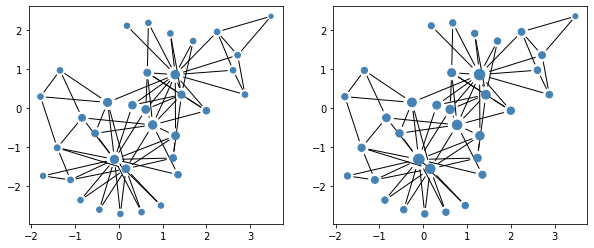

In [6]:
print('the ZK graph with node size proportional to closeness (left) and harmonic centrality (right):')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs_ZK_cl = {"bbox":(300,300), "margin":20}
vs_ZK_cl['vertex_size'] = [15*x for x in ZK.closeness()]
igraph.plot(ZK, **vs_ZK_cl, target=ax[0])
vs_ZK_hc = {"bbox":(300,300), "margin":20}
vs_ZK_hc['vertex_size'] = [15*x for x in ZK.harmonic_centrality()]
igraph.plot(ZK, **vs_ZK_hc, target=ax[1])

### Degree-based centrality vs. geometric centrality ###

The most central vertices under geometric centrality measures are often **completely different** from those identified by degree-based measures.

Degree-based centralities emphasize different aspects of network structure.
Broadly speaking, they measure *different paths of different types*. For instance, PageRank can be viewed as a "sum" of random paths on the network that touch a given vertex $i$.

Geometric centralities assume that *only* the **shortest-path** is relevant.

As a result, these two families of measures are correlated for *certain* types of networks.

### Betweenness centrality ###

The **betweenness** centrality is also derived from geodesic paths, but it relies on the notion that important vertices are the "**bridges**" over which information tends to flow.

In the seminal paper "The strength of weak ties", Mark Granovetter shows that most job seekers (who participated in the study) found their ultimate employment through a *weak* tie (an acquaintance), rather than a *strong* tie (a close friend).
The theoretical argument was that the information residing at either end of a strong tie is nearly identical, because these vertices **frequently exchange information**, whereas weak ties **synchronize** their **information rarely**.

The implication is that vertices that serve as **information bridges** for **many pairs** of other vertices are important.
This is quantified by the betweenness centrality as follows:
$$b_i = \frac{1}{n^2}\sum_{jk} \frac{\#\{\text{shortest paths } j\to \cdots \to i \to \cdots \to k\}}{\#\{\text{shortest paths } j\to \cdots \to k\}} = \frac{1}{n^2}\sum_{jk} \frac{\sigma_{jk}(i)}{\sigma_{jk}} \qquad \text{with } \frac{0}{0}=0 \text{ for disconnected } j,k$$

The betweenness centrality is **expensive**: $O(n^3)$ time and $O(n^2)$ space for a naive enumeration, $O(n(n+m))$ time (for unweighted networks) for an *approximation* based on a solution to the single-source shortest path problem.

### Betweenness centrality, an example ###

<img src="images/sample_graph.png" alt="A small sample graph" title="A small sample graph" style="width: 300px;"/>

The red vertex lies on every geodesic between the left and right groups, of which there are 72.
It also lies on every geodesic path from it to other vertices in the left group, of which there are 6.
This gives $b = 78/144\approx 0.542$ for the red vertex.
This is the maximal value in the graph, making the red vertex the most central vertex according to the betweenness centrality.
The minimal score is $b = 23/144 \approx 0.16$, can you identify which vertex attains it?

In [7]:
import numpy as np
print('a comparison of the top-5 for a few metrics for the ZK graph:')
bc = ZK.betweenness()
hc = ZK.harmonic_centrality()
print('normalized degree:')
print(*[(i+1,np.round(normalized_degree[i],3)) for i in np.argsort(normalized_degree)[:-6:-1]])
print('PageRank:')
print(*[(i+1,np.round(pagerank[i],3)) for i in np.argsort(pagerank)[:-6:-1]])
print('harmonic centrality:')
print(*[(i+1,np.round(hc[i],3)) for i in np.argsort(hc)[:-6:-1]])
print('betweenness centrality:')
print(*[(i+1,np.round(bc[i]/ZK.vcount()**2,3)) for i in np.argsort(bc)[:-6:-1]])

a comparison of the top-5 for a few metrics for the ZK graph:
normalized degree:
(34, 0.218) (1, 0.205) (33, 0.154) (3, 0.128) (2, 0.115)
PageRank:
(34, 0.101) (1, 0.097) (33, 0.072) (3, 0.057) (2, 0.053)
harmonic centrality:
(34, 0.705) (1, 0.702) (3, 0.636) (33, 0.634) (32, 0.586)
betweenness centrality:
(1, 0.2) (34, 0.139) (33, 0.066) (3, 0.066) (32, 0.063)


the ZK graph with node size proportional to degree (left) and betweenness centrality (right):


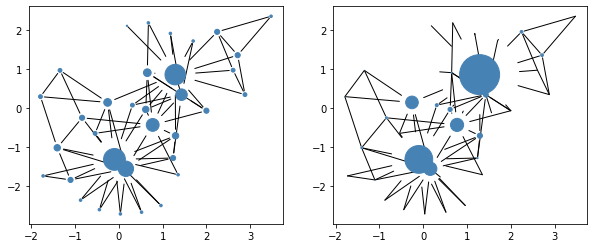

In [8]:
print('the ZK graph with node size proportional to degree (left) and betweenness centrality (right):')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs_ZK_d = {"bbox":(300,300), "margin":20}
vs_ZK_d['vertex_size'] = [100*x for x in normalized_degree]
igraph.plot(ZK, **vs_ZK_d, target=ax[0])
vs_ZK_bc = {"bbox":(300,300), "margin":20}
vs_ZK_bc['vertex_size'] = [200*x/ZK.vcount()**2 for x in bc]
igraph.plot(ZK, **vs_ZK_bc, target=ax[1])

### Comparing centralities ###

For the ZK network, all centrality measures more-or-less **agree** that the most important vertices are 1, 34, 33, 32 and 3, plus a few others.
We may conclude that these vertices play special roles in structuring the karate club.

In general, **different vertices** may be important for **different aspects** of a network functioning.
For instance, a having a single connection to another, highly central vertex has minimal betweenness (why?), but high closeness/harmonic centrality (why?).

In the picture, you see degree (A), closeness (B), betweenness (C) and eigenvector (D) centralities for a sample graph (red=high, blue=low).

<img src="images/comparison.png" alt="Comparison of centralities for a sample graph" title="Comparison of centralities for a sample graph" style="width: 300px;"/>
